In [34]:
%matplotlib notebook

import pylab as plt
import numpy as np
import seaborn as sns; sns.set()

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix, roc_curve, auc


import pandas as pd

In [35]:
data = pd.read_csv('./Data/encoded_data_5%.csv') # nrows = [0, 10000000]

In [36]:
del data['Unnamed: 0'] #this is a problem with the index that came duplicated

In [37]:
features = list(data.columns)
features.remove('no_show') #this removes the output (no show) from the training variables
Y = data['no_show']
X = data[features]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 10)


In [39]:
y_train = keras.utils.np_utils.to_categorical(y_train.astype(int))
y_test = keras.utils.np_utils.to_categorical(y_test.astype(int))

In [40]:
m = Sequential()
m.add(Dense(70,  activation='relu', input_shape=(87,)))
m.add(Dense(60,  activation='relu'))
m.add(Dense(40,  activation='relu'))
m.add(Dense(20,  activation='relu'))
m.add(Dense(10,  activation='relu'))
m.add(Dense(5,  activation='relu'))
m.add(Dense(2,  activation='sigmoid'))
m.compile(loss='binary_crossentropy', optimizer = Adam(), metrics=['accuracy'])

history = m.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data = (X_test, y_test))

Train on 129232 samples, validate on 32309 samples
Epoch 1/10
129232/129232 [==============================] - 15s 117us/step - loss: 0.2411 - acc: 0.9293 - val_loss: 0.2342 - val_acc: 0.9291
Epoch 2/10
129232/129232 [==============================] - 17s 131us/step - loss: 0.2350 - acc: 0.9294 - val_loss: 0.2432 - val_acc: 0.9291
Epoch 3/10
129232/129232 [==============================] - 13s 98us/step - loss: 0.2337 - acc: 0.9294 - val_loss: 0.2340 - val_acc: 0.9291
Epoch 4/10
129232/129232 [==============================] - 13s 103us/step - loss: 0.2331 - acc: 0.9294 - val_loss: 0.2341 - val_acc: 0.9291
Epoch 5/10
129232/129232 [==============================] - 12s 94us/step - loss: 0.2326 - acc: 0.9294 - val_loss: 0.2363 - val_acc: 0.9291
Epoch 6/10
129232/129232 [==============================] - 12s 94us/step - loss: 0.2325 - acc: 0.9294 - val_loss: 0.2333 - val_acc: 0.9291
Epoch 7/10
129232/129232 [==============================] - 12s 94us/step - loss: 0.2320 - acc: 0.9294 - v

In [69]:
m.save('neural_net_model')
m.save_weights("model_weights")

In [41]:
y_test = np.argmax(y_test, axis = 1)

In [42]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
m.predict(X_test)

array([[0.9895302 , 0.0105257 ],
       [0.9935771 , 0.00646666],
       [0.92226535, 0.07767805],
       ...,
       [0.85496765, 0.14467716],
       [0.92697287, 0.07298726],
       [0.87420654, 0.1255322 ]], dtype=float32)

<IPython.core.display.Javascript object>


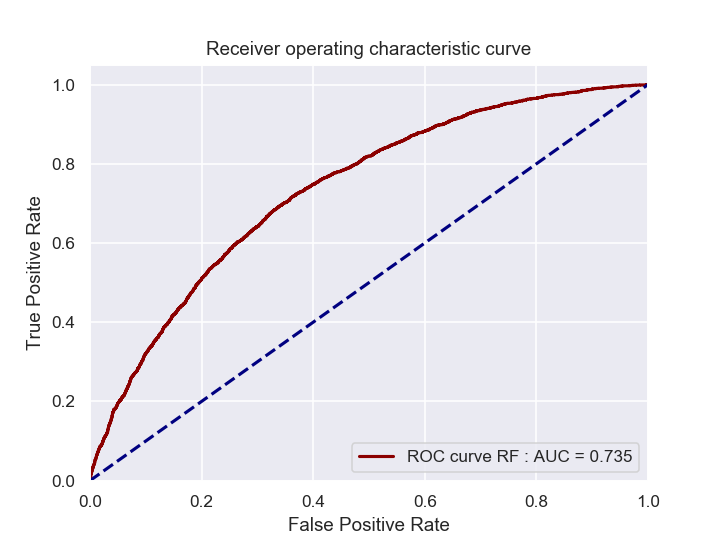

In [50]:
y_pred = m.predict(X_test)
fpr,tpr,_=roc_curve(y_test,y_pred[:,1])
area=auc(fpr,tpr)
fig=plt.figure()
lw = 2
plt.plot(fpr,tpr,color="darkred", lw=lw, label="ROC curve RF : AUC = {:.3f}".format(area))
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")

<IPython.core.display.Javascript object>


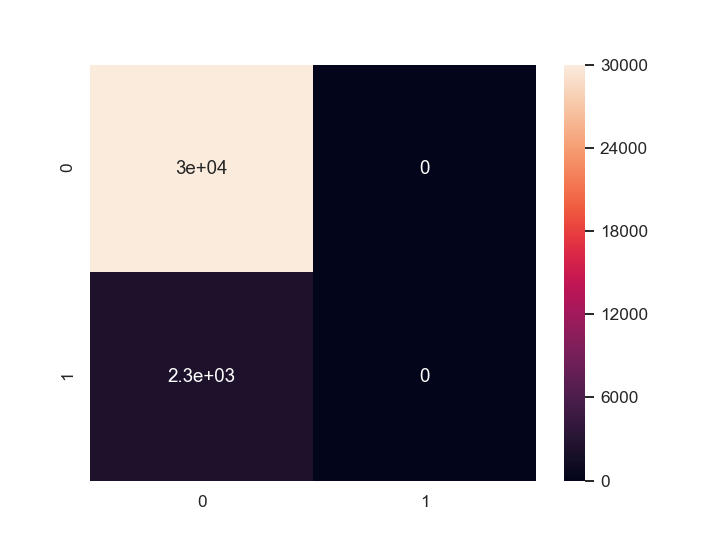

In [52]:
y_pred_binary = np.argmax(m.predict(X_test), axis = 1)
CM=confusion_matrix(y_test, y_pred_binary)
fig=plt.figure()
sns.heatmap(CM, annot=True)

In [56]:
np.argmax(m.predict(X_train), axis = 1)
np.argmax(y_train, axis = 1)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [57]:


err_train = sum(abs(np.argmax(m.predict(X_train), axis = 1) - np.argmax(y_train, axis = 1) ))/len(y_train)
err_test = sum(abs(y_pred_binary -  y_test))/len(y_test)



recall = CM[1,1]/(CM[1,0]+CM[1,1]) # tp/(tp+fn)
precision = CM[1,1]/(CM[0,1]+CM[1,1]) # # tp/(tp+fp)
tnr = CM[0,0]/(CM[0,1]+CM[0,0]) # tn/(tn+fp) Acc-
tpr = recall # Acc+

f_measure = 2*precision*recall/(precision+recall)
g_mean = (tpr*tnr) ** 0.5
weighted_accuracy = 0.5 * tnr + 0.5 * tpr


print('True Negative Rate (Acc-): {:.2f}%'.format(100*tnr))
print('True Positive Rate (Acc+): {:.2f}%'.format(100*tpr))
print('G-Mean: {:.2f}%'.format(100*g_mean))
print('Weighted Accuracy: {:.2f}%'.format(100*weighted_accuracy))
print('Precision: {:.2f}%'.format(100*precision))
print('Recall: {:.2f}%'.format(100*recall))
print('F-measure: {:.2f}%'.format(100*f_measure))

print('The training error is {:.2f}% and the test error is {:.2f}%'.format(err_train*100, 
                                                                             err_test*100))

True Negative Rate (Acc-): 100.00%
True Positive Rate (Acc+): 0.00%
G-Mean: 0.00%
Weighted Accuracy: 50.00%
Precision: nan%
Recall: 0.00%
F-measure: nan%
The training error is 7.06% and the test error is 7.09%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':
